In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the dataset
df = pd.read_csv("Retail Sales Data with Seasonal Trends & Marketing.csv")
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [ ]:
#check size of data
df.shape

In [7]:
#Information of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [7]:
df["Product Category"].unique()

array(['Furniture', 'Electronics', 'Groceries', 'Clothing'], dtype=object)

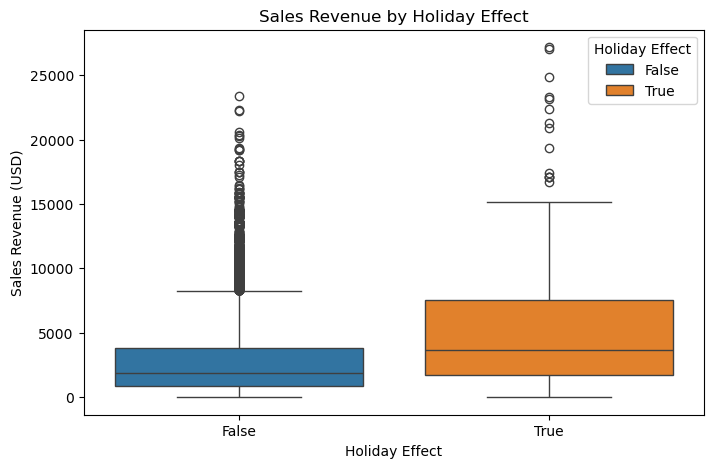

In [33]:
#Sales Revenue By holiday Effect
plt.figure(figsize = (8,5))
sns.boxplot(data = df,
            x = "Holiday Effect",
            y = "Sales Revenue (USD)",
            hue = "Holiday Effect")
plt.title("Sales Revenue by Holiday Effect")
plt.show()


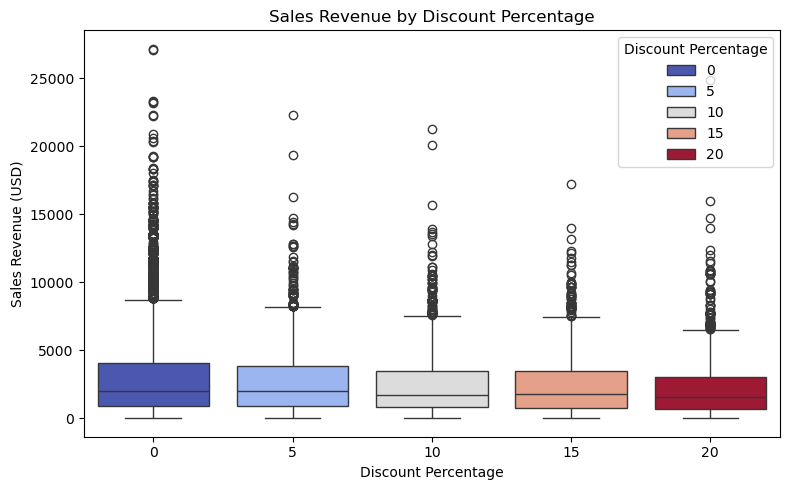

In [34]:
#Sales Revenue by Discount Percentage
plt.figure(figsize = (8,5)),
sns.boxplot(data = df,
            x = "Discount Percentage",
            y = "Sales Revenue (USD)",
            hue = "Discount Percentage",
            palette = "coolwarm")
plt.title(f"Sales Revenue by Discount Percentage")
plt.tight_layout()
plt.show()

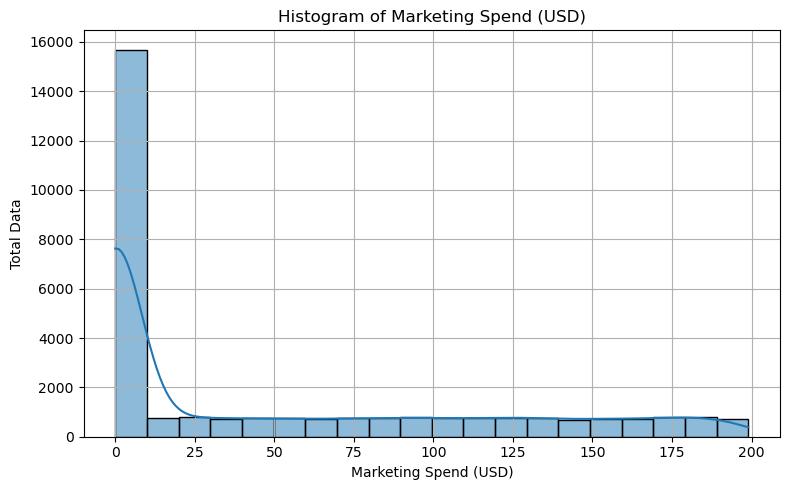

In [35]:
#Sales Revenue by Marketing Spend
plt.figure(figsize = (8,5))
sns.histplot(data =df,
             x = "Marketing Spend (USD)",
             kde = True,
             bins = 20)
plt.ylabel("Total Data")
plt.title("Histogram of Marketing Spend (USD)")
plt.tight_layout()
plt.grid()
plt.show()

In [10]:
#Check for missing values
print("\nNumber of missing record")
print(df.isna().sum())


Number of missing record
Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64


In [13]:
# Drop rows with missing values
df = df.dropna()
#Check for duplicate rows
df = df.drop_duplicates()

In [11]:
# Check data types
print("\nData Types:")
print(df.dtypes)
# Select columns with object (categorical) data types
categorical_cols = df.select_dtypes(include=['object']).columns


Data Types:
Store ID                  object
Product ID                 int64
Date                      object
Units Sold                 int64
Sales Revenue (USD)      float64
Discount Percentage        int64
Marketing Spend (USD)      int64
Store Location            object
Product Category          object
Day of the Week           object
Holiday Effect              bool
dtype: object


In [12]:
# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

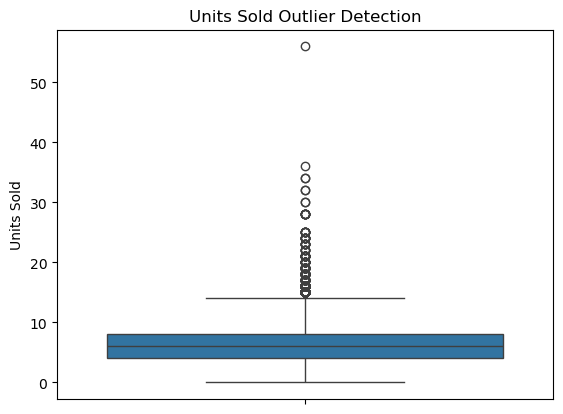

In [21]:
#Outlier detection
sns.boxplot(df['Units Sold'])
plt.title('Units Sold Outlier Detection')
plt.show()

In [25]:
#Save the cleaned data
df.to_csv('Retail_sales_cleaned.csv', index=False)

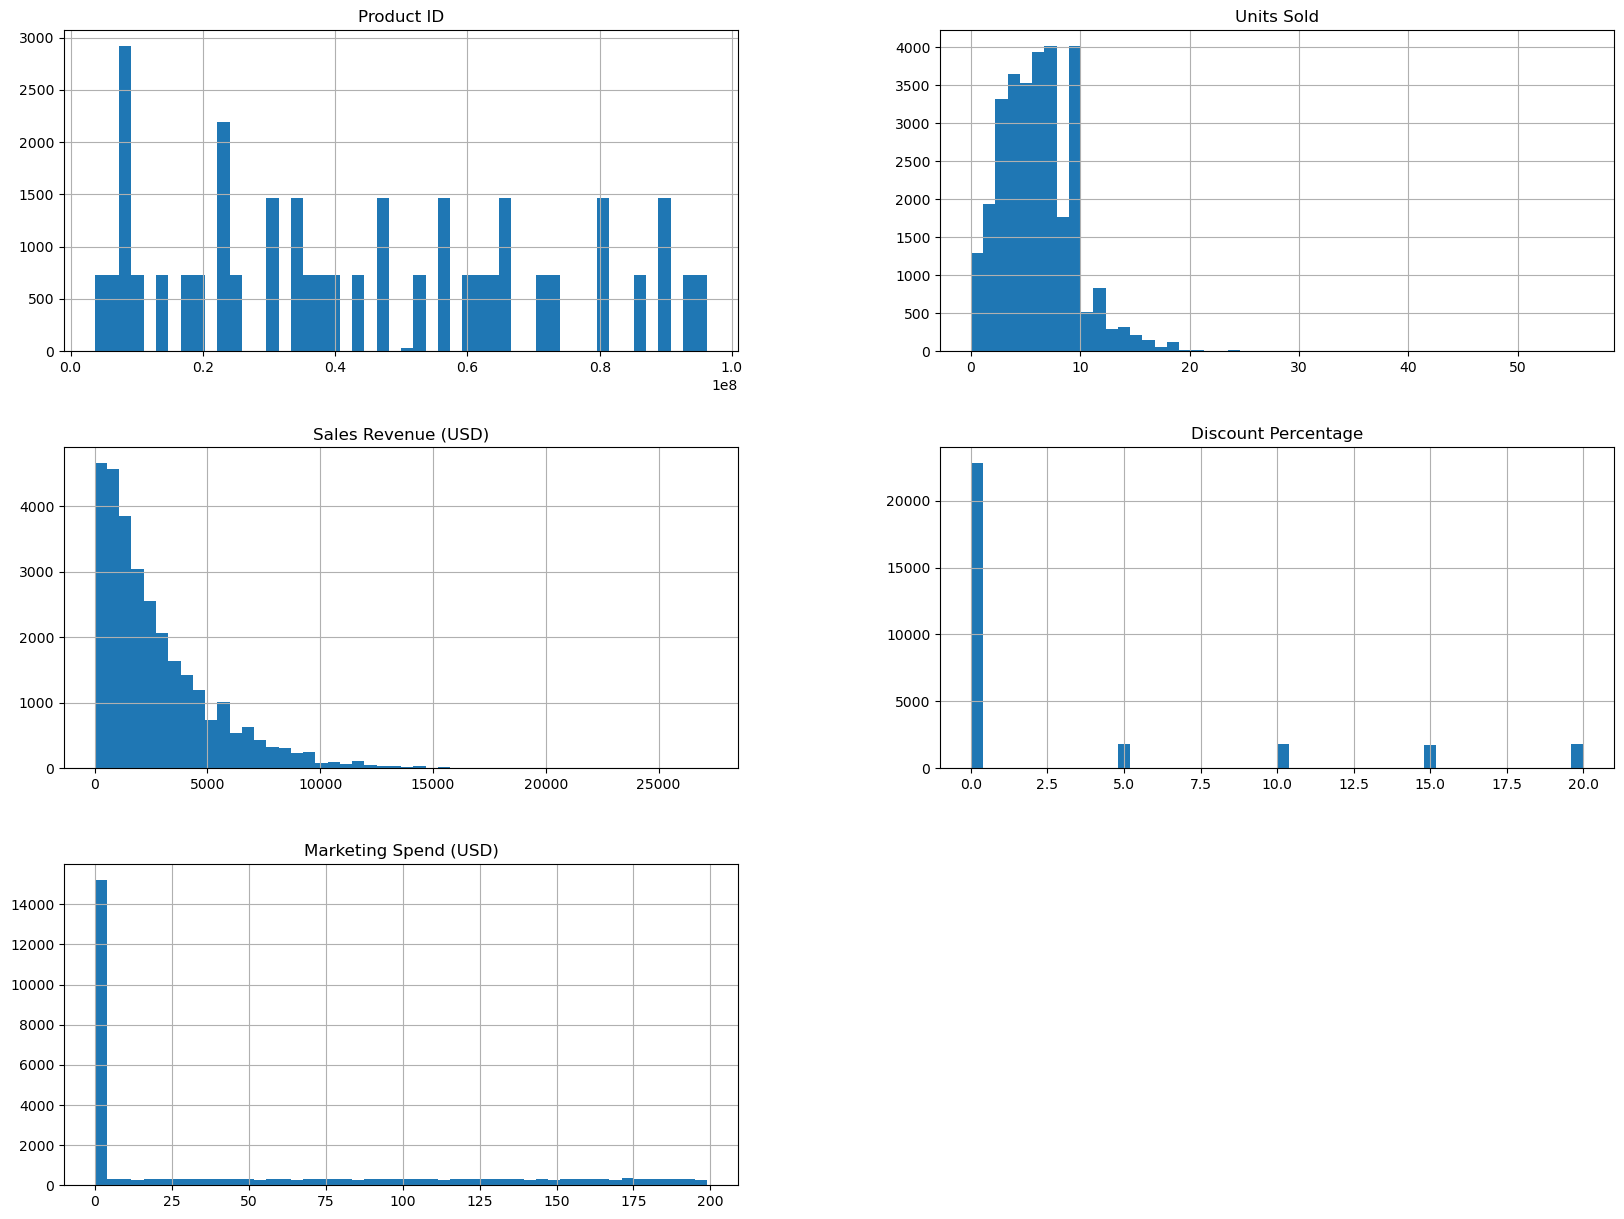

In [26]:
#EDA: Univariate Analysis
df_encoded.hist(bins=50, figsize=(20, 15))
plt.savefig('all.png', dpi=300)
plt.show()

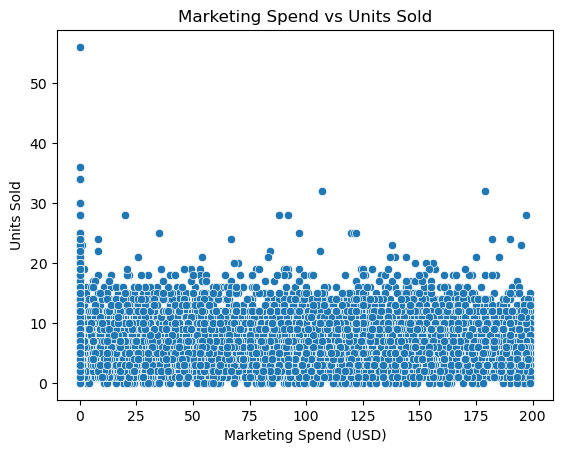

In [27]:
# Bivariate Analysis
sns.scatterplot(x='Marketing Spend (USD)', y='Units Sold', data=df_encoded)
plt.title('Marketing Spend vs Units Sold')
plt.savefig('spendVSunits.png', dpi=300)
plt.savefig('spendbyunitssold.png', dpi=300)
plt.show()

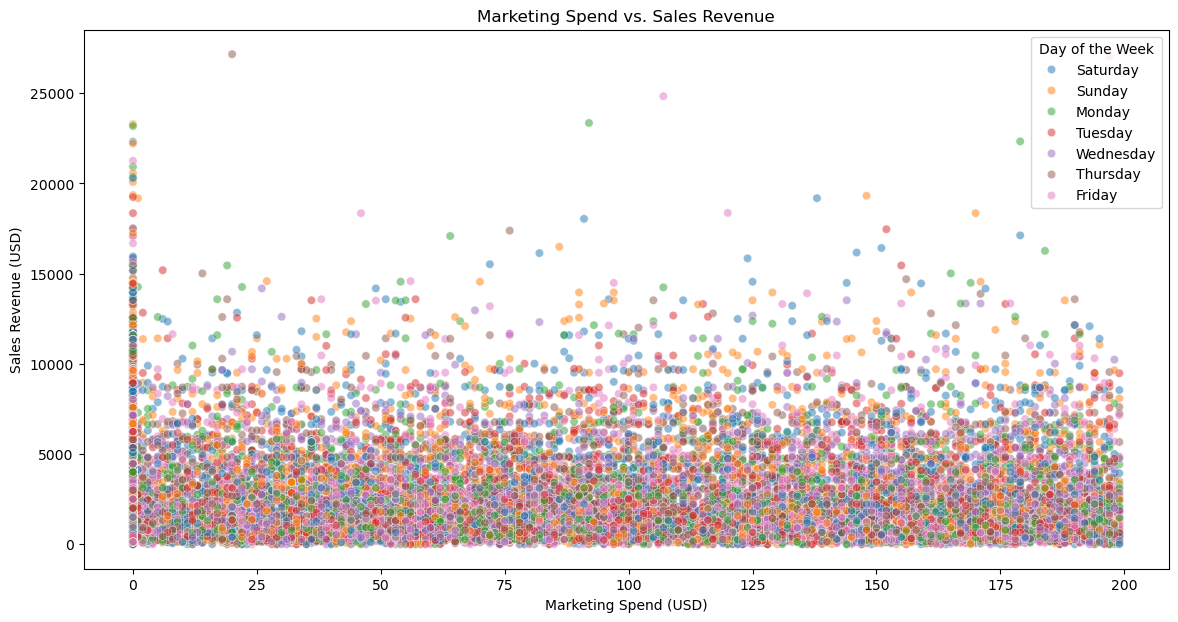

In [28]:
# Marketing Spend vs. Sales Revenue
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Marketing Spend (USD)', y='Sales Revenue (USD)', alpha=0.5, hue='Day of the Week')
plt.title('Marketing Spend vs. Sales Revenue')
plt.xlabel('Marketing Spend (USD)')
plt.ylabel('Sales Revenue (USD)')
plt.savefig('revenuebyspend.png', dpi=300)
plt.show()

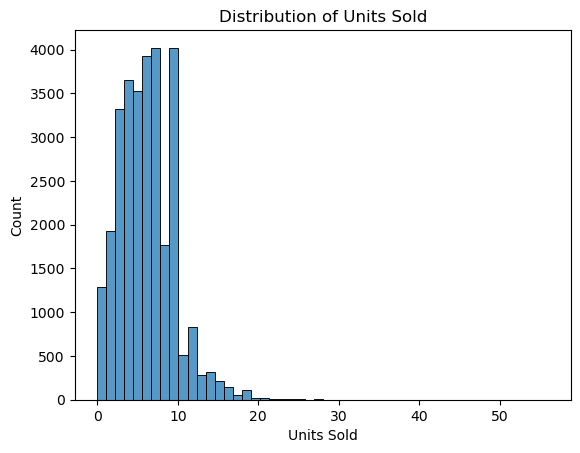

In [29]:
sns.histplot(df['Units Sold'], bins=50)
plt.title('Distribution of Units Sold')
plt.savefig('units_sold_distribution.png', dpi=300)  # Adjust dpi for resolution
plt.show()

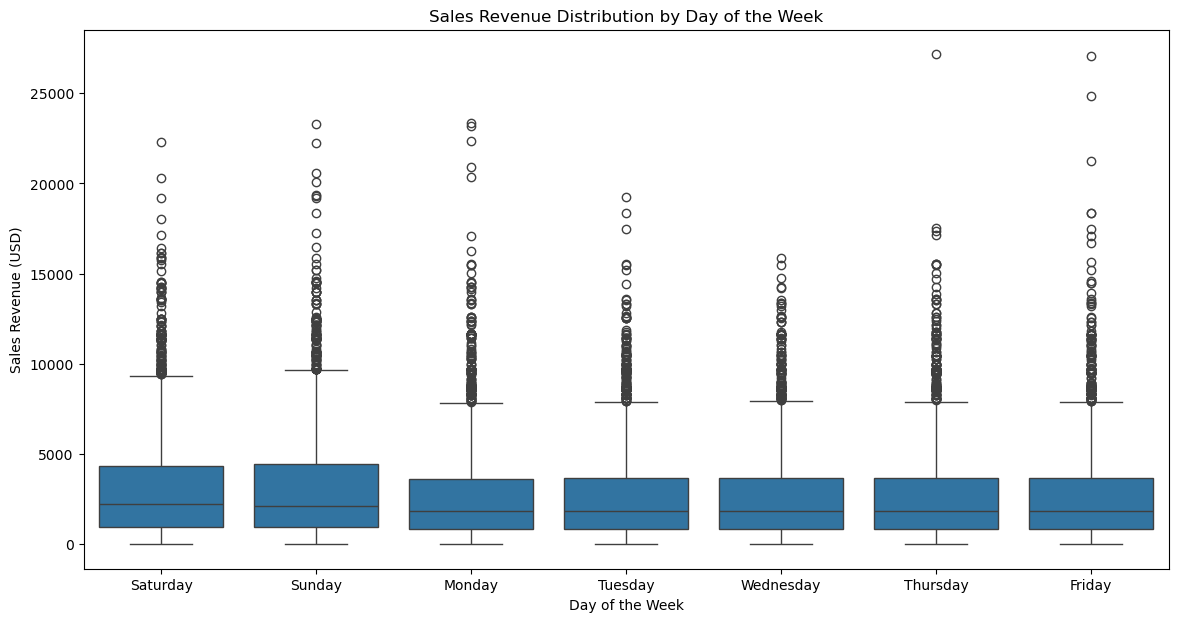

In [30]:
# Save the figure as a PNG file
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Day of the Week', y='Sales Revenue (USD)')
plt.title('Sales Revenue Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Revenue (USD)')
#plt.xticks(rotation=45)
plt.savefig('revenuebyweekday.png', dpi=300)
plt.show()

In [34]:
# Aggregate sales revenue by store location
store_revenue = df.groupby('Store Location')['Sales Revenue (USD)'].sum()

In [33]:
# Sort the values and select the top N store locations
top_n = 10  # Number of top store locations to display
top_store_revenue = store_revenue.sort_values(ascending=False).head(top_n)

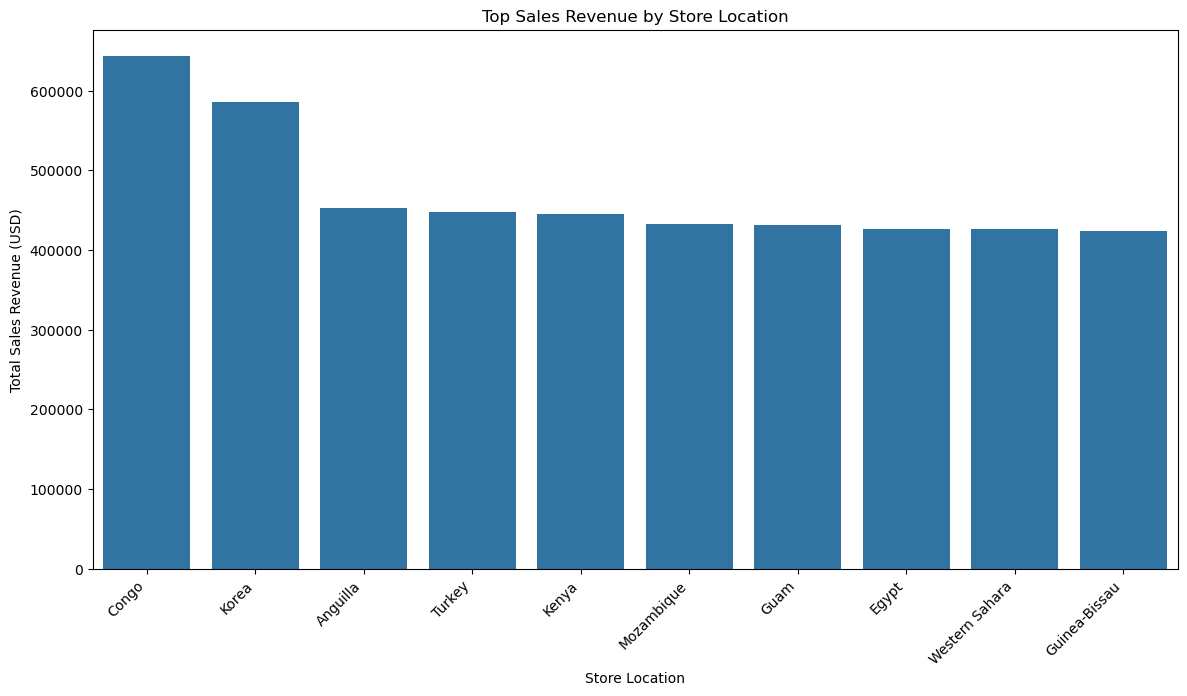

In [36]:
# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_store_revenue.index, y=top_store_revenue.values)
plt.title('Top Sales Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales Revenue (USD)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment
plt.savefig('revenuebylocation.png', dpi=300)
plt.show()

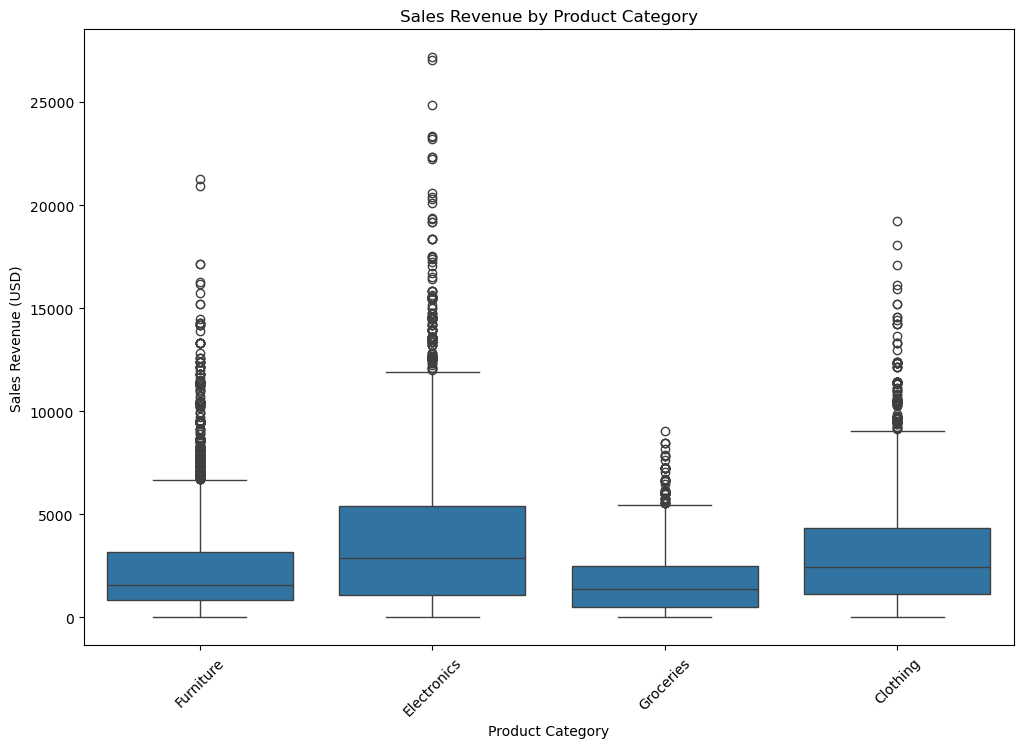

In [5]:
#Sales Revenue by Product Category

plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Sales Revenue (USD)', data=df)
plt.title('Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Revenue (USD)')
plt.xticks(rotation=45)
plt.savefig('revenuebyproduct.png', dpi=300)
plt.show()


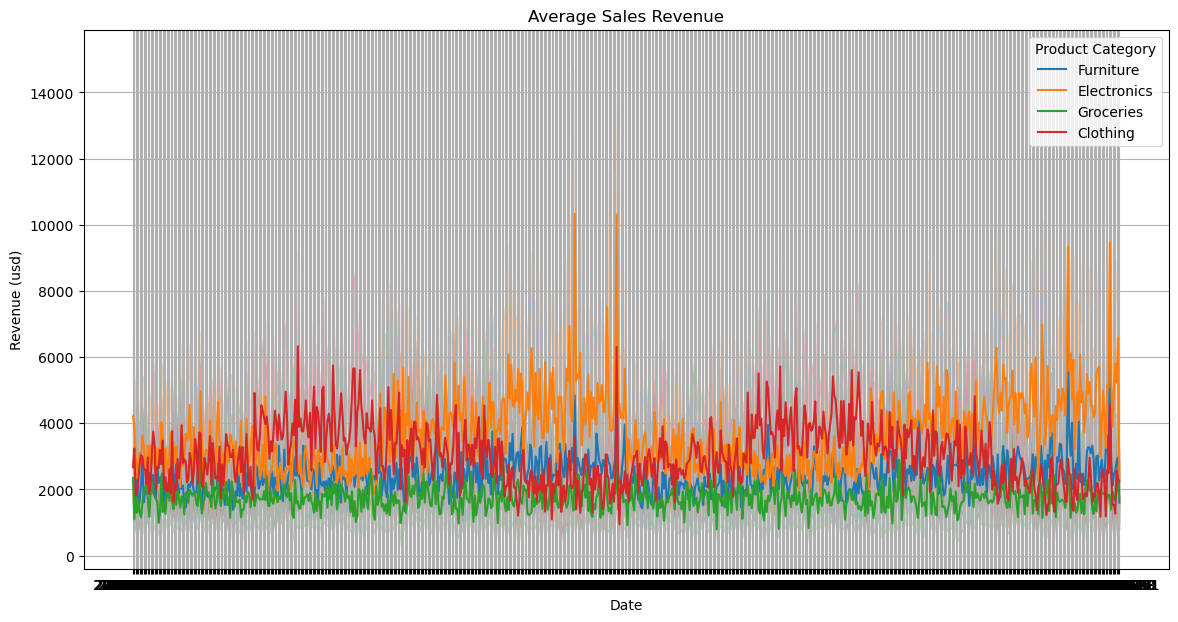

In [6]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df,x='Date',y='Sales Revenue (USD)', hue = 'Product Category',estimator='mean',palette='tab10')
plt.title('Average Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (usd)')
plt.grid(True)
plt.savefig('revenueproductdate.png', dpi=300)
plt.show()

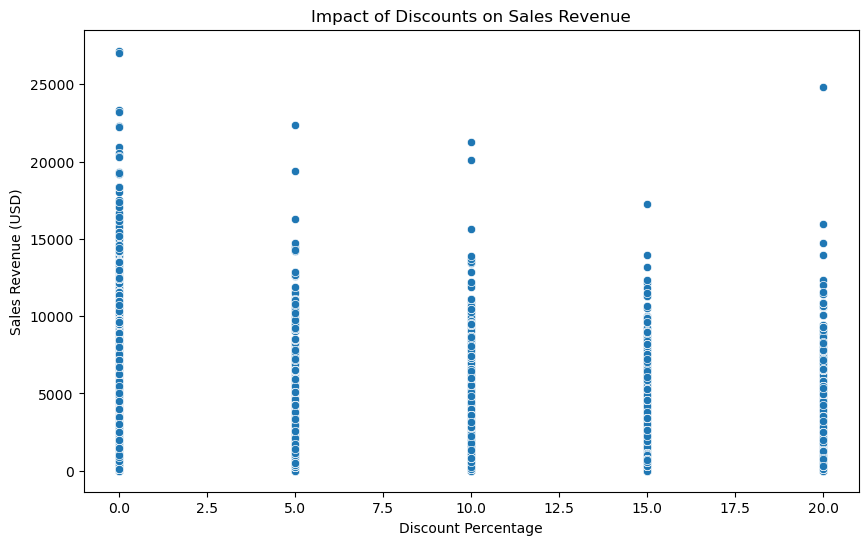

In [13]:
#Impact of Discounts on Sales Revenue
plt.figure(figsize=(10, 6))
#sns.boxplot(x='Discount Percentage', y='Sales Revenue (USD)', data=df_encoded)
sns.scatterplot(x='Discount Percentage', y='Sales Revenue (USD)', data=df_encoded)
plt.title('Impact of Discounts on Sales Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Revenue (USD)')
plt.savefig('revenuediscount.png', dpi=300)
plt.show()

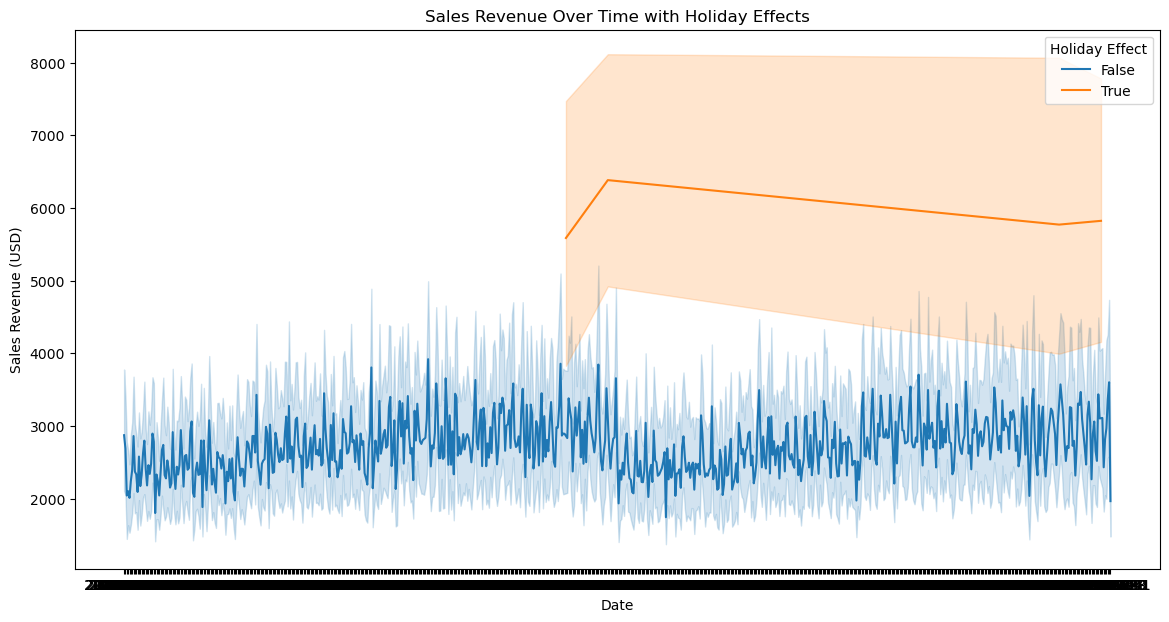

In [15]:
#Sales revenue over time with holiday effect
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=df)
plt.title('Sales Revenue Over Time with Holiday Effects')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend(title='Holiday Effect')
plt.savefig('revenueholiday.png', dpi=300)
plt.show()

In [21]:
#Multivariate Analysis
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])

In [20]:
# Calculate correlation matrix on numeric columns
corr_matrix = numeric_df.corr()

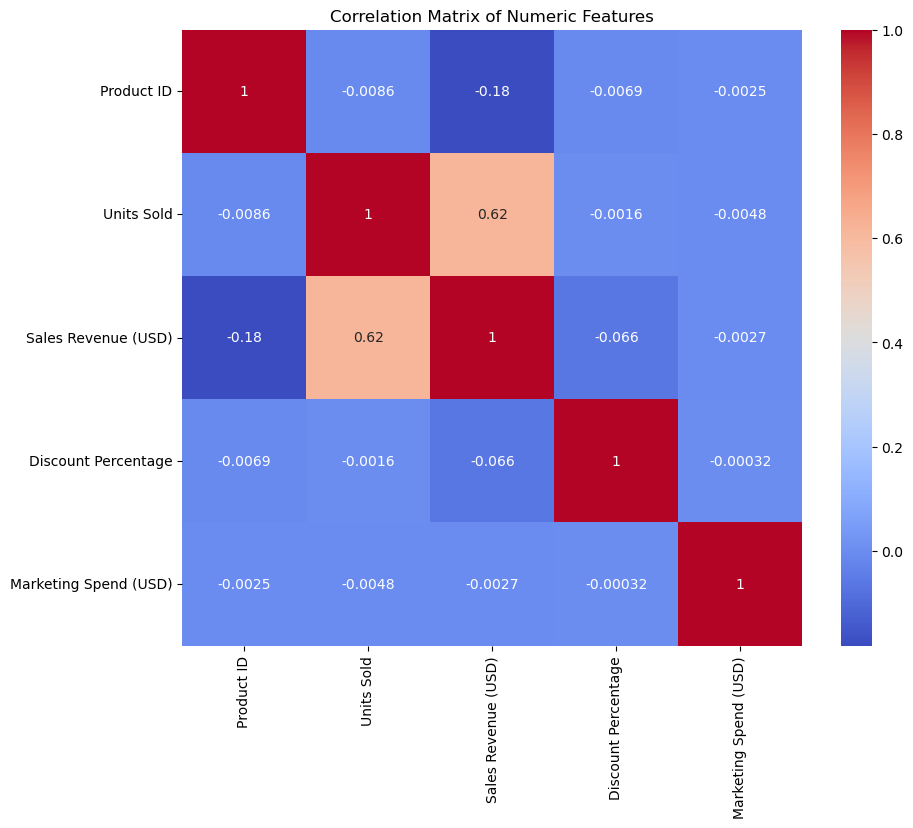

In [22]:
# Plot the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.savefig('corr_matrix.png', dpi=300)
plt.show()

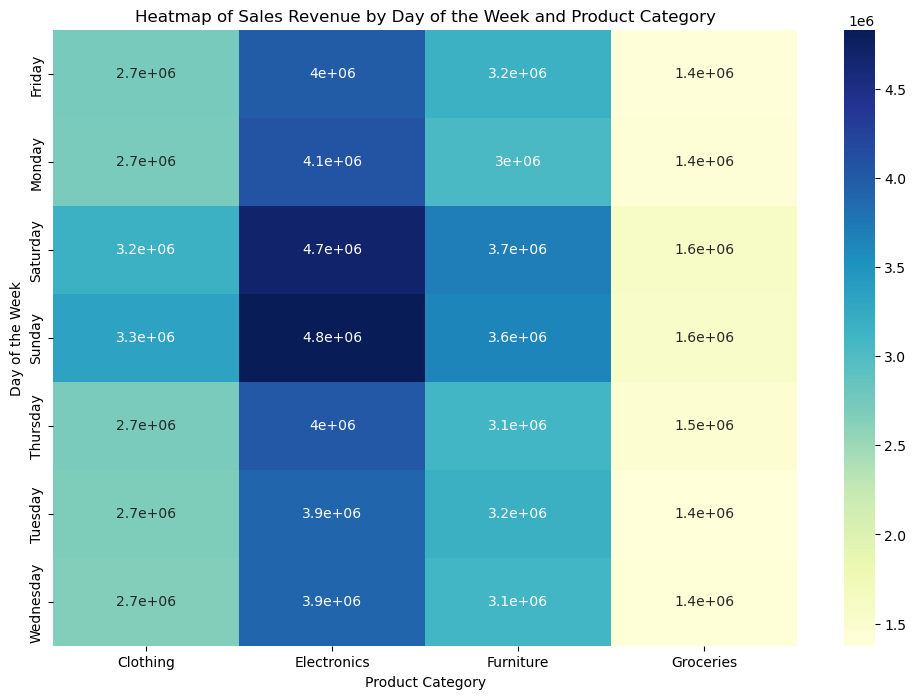

In [23]:
#Heatmap of Sales Revenue by Day of the Week and Product Category
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(index='Day of the Week', columns='Product Category', values='Sales Revenue (USD)', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Sales Revenue by Day of the Week and Product Category')
plt.savefig('salesweekproduct.png', dpi=300)
plt.show()